In [1]:
# Chapter 2

import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns;
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from IPython.display import display
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

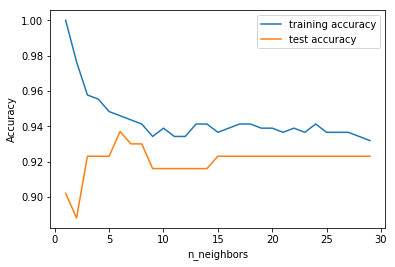

In [2]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

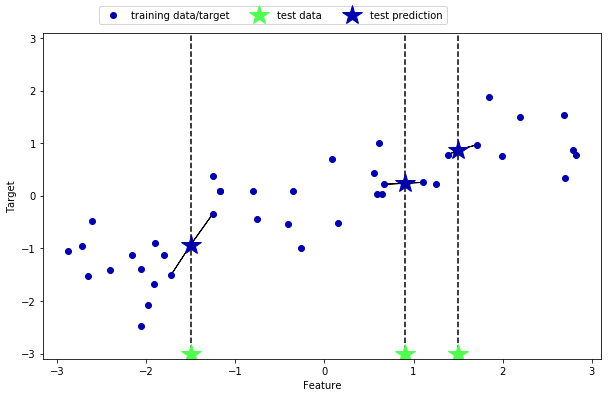

In [3]:
# K-Neighbor Regression
mglearn.plots.plot_knn_regression(n_neighbors=2)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test set predictions:\n{}".format(reg.predict(X_test)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2: 0.83


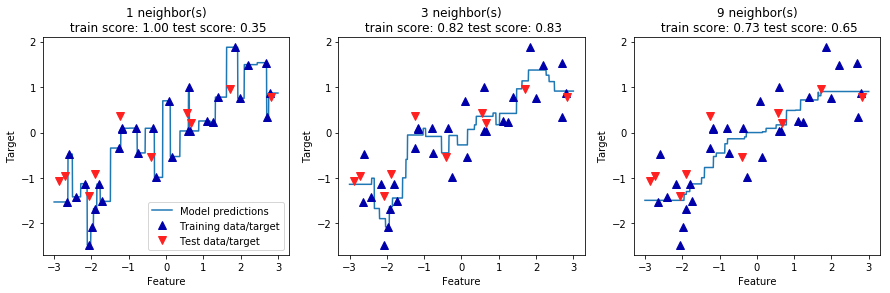

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                            n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

w[0]: 0.393906  b: -0.031804


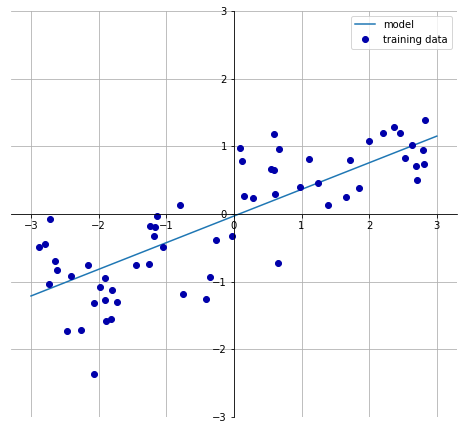

In [6]:
# Linear Regression
mglearn.plots.plot_linear_regression_wave()

Variance y_train: 0.793355333054839
Variance y_test: 1.2414047475609313
lr.coef_ (w): [0.39390555]
lr.intercept_ (b): -0.031804343026759746
Training set score: 0.67
Testing set score: 0.66


Text(0.5, 1.0, 'Linear Regression demo')

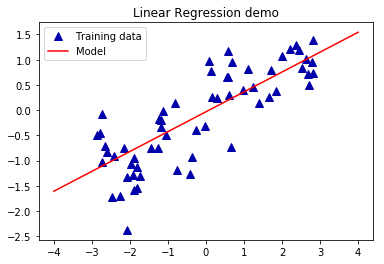

In [7]:
from sklearn.linear_model import LinearRegression
# 1 dimesional dataset
X, y = mglearn.datasets.make_wave(n_samples=60)
# Visualize dataset
plt.plot(X, y, '^', c=mglearn.cm2(0), markersize=8)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("Variance y_train:", np.var(y_train, ddof=1))
print("Variance y_test:", np.var(y_test, ddof=1))

print("lr.coef_ (w): {}".format(lr.coef_))
print("lr.intercept_ (b): {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(lr.score(X_test, y_test)))

line = np.linspace(-4, 4, 10).reshape(-1, 1)
plt.plot(line, lr.predict(line), color='r')
plt.legend(('Training data', 'Model'), loc='best')
plt.title('Linear Regression demo')

In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
# Variance of target
print(np.var(y_train, ddof=1))
print(np.var(y_test, ddof=1))

85.53391869442001
82.34742032245968


In [9]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [10]:
# Ridge Regression using l2 regularization to limited overfiting
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

Training set score: 0.93
Test set score: 0.77
Number of features used: 104


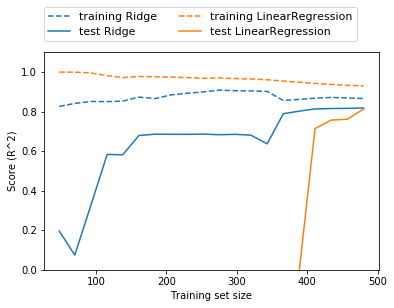

In [11]:
mglearn.plots.plot_ridge_n_samples()

In [12]:
# Lasso using L1 regularization, "Least Absolute Shrinkage and Selection Operator"
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01,  max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [13]:
# Combine between Lasso and Ridge Regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
regr = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(regr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(regr.score(X_test, y_test)))
print("Number of features used: {}\n".format(np.sum(regr.coef_ != 0)))

Training set score: 0.86
Test set score: 0.72
Number of features used: 84



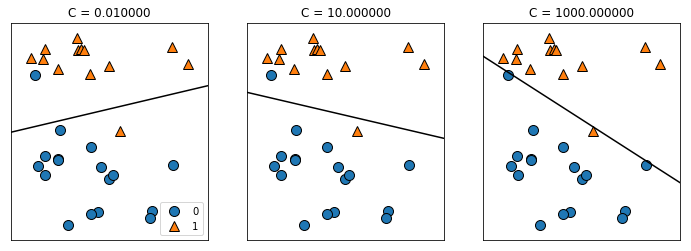

In [14]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


mglearn.plots.plot_linear_svc_regularization()

In [15]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    random_state=50)
logreg = LogisticRegression(C=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
# Variance of target
print(np.var(y_train, ddof=1))
print(np.var(y_test, ddof=1))

Training set score: 0.969
Test set score: 0.972
0.23448218724109365
0.23490593913129118


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/home/tinhtn/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Coefficient shape:  (3, 2)
Intercept shape:  (3,)


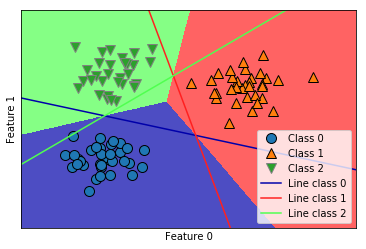

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=40)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                    mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 0)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc='best')
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)

In [17]:

# Predict
X_test=[[6, -4]]
print(linear_svm.predict(X_test))

[1]
